# Modelling

---

1. Import packages
2. Load data
3. Modelling
Below, under Model Training, we explain the rationale for the training 
---

## 1. Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8676\1986948091.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


---
## 2. Load data

In [3]:
df = pd.read_csv('./data-for-predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [4]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [5]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
t = df['churn']
S = df.drop(columns=['churn'])

S_train, S_test, t_train, t_test = train_test_split(S, t, test_size=0.25, random_state=42)

In [6]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

### Check for Correlation Between Features
During feature engineering and exploratory data analysis, we were able to determine which features may likely have had a better influence on churn than other features. We did this by using correlation, proportions of customers who churned, or changes in price category. Those features are included in the list below. Yet first, we need to make sure that we do not include features that are highly correlated to each other in order to avoid multicollinearity. 

In [8]:
# Creat a list of the selected features
col_list2 = ['margin_net_pow_ele', 'months_activ', 'peak_mid_peak_fix_max_monthly_diff', 'forecast_cons_12m', 'var_year_price_off_peak_var', 'has_gas', 'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws', 'channel_lmkebamcaaclubfxadlmueccxoimlema']

# Check for correlation between features
X_features = X_train[col_list2]
X_features.corr()

,margin_net_pow_ele,months_activ,peak_mid_peak_fix_max_monthly_diff,forecast_cons_12m,var_year_price_off_peak_var,has_gas,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,channel_lmkebamcaaclubfxadlmueccxoimlema
margin_net_pow_ele,1.000000,-0.087021,0.083297,-0.112208,0.213897,-0.013686,-0.037700,-0.021675
months_activ,-0.087021,1.000000,0.097402,-0.068360,-0.043197,0.010476,0.210361,0.032742
peak_mid_peak_fix_max_monthly_diff,0.083297,0.097402,1.000000,0.108912,0.015849,0.045451,-0.122911,-0.000260
forecast_cons_12m,-0.112208,-0.068360,0.108912,1.000000,-0.031742,0.097484,-0.029880,0.082157
var_year_price_off_peak_var,0.213897,-0.043197,0.015849,-0.031742,1.000000,0.004239,-0.020142,-0.015420
has_gas,-0.013686,0.010476,0.045451,0.097484,0.004239,1.000000,-0.013412,0.034512
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,-0.037700,0.210361,-0.122911,-0.029880,-0.020142,-0.013412,1.000000,0.184581
channel_lmkebamcaaclubfxadlmueccxoimlema,-0.021675,0.032742,-0.000260,0.082157,-0.015420,0.034512,0.184581,1.000000


The highest correlation in the table above is 0.21, so we see that the chosen features are not even moderately correlated one to another. 

### Reasons for Choosing Metrics

Here, we'll explain why we selected the 8 features that we did. Attributes that are moderately or highly correlated are not included together in the model.

- ##### Electricity Code Campaigns
  The code of electricity campaign to which the client initially subscribed reveals the company's initial desires, and also may relate to how electricity is used or what type of buildings are using electricity. It is important to note the percentages of clients who chuned in each electriciy code campain category. The code campain with the most churn had 12.6% of clients who churned, whereas the code campaign with the least churn had only 5.6% of clients who churned. We'll include the code campain with the most churn in the model. (By the way, there were two code campains that had no churn, but there are only 3 clients with those codes, so those codes were not included in the model.)
- ##### Sales Channels
  What type of client is most likely to be retained by PowerCo? How should we market to them and why? Answering these are types of questions will lead to choosing a sales channel. The clients from the sales channel with the most churn had a 12% churn rate, but since that correlates moderately with the code campaign just chosen, we'll use the sales channel with the least churn, which is 5.6%. (By the way, there were three sales channels that had no churn, but there are only 14 clients in those sales channels. Accordingly, those sales channels were not included.)
- ##### Net Margin on Power Subscription
  Net Margin, the percent of profit retained, is crucial to PowerCo's financial gains. It also has a relatively high correlation with customer churn when compared to other metrics.
- ##### Months Active
  Companies who have been with PowerCo for less than 5 months are much more likely to churn. And those who have been with PowerCo for years are much less likely to churn.
- ##### Energy Price During 1st Period
  If customers are more likely to churn during the first 4 months, then it would make sense that keeping prices low during that first period would be important. Also, of the original price variables, this price variable has the highest correlation with churn
- ##### Maximum Average Price Power Difference
  Do significant price hikes ever make you cringe? We found the maximum change in price of power between the 2nd and 3rd periods. It proves to have a higher correlation with churn than the other attributes based on price changes. 
- ##### Got Gas?
  Customers who buy gas from PowerCo are 2% less likely to churn. 
- ##### Forecasted Electricity Consumption
  Companies may be paying attention to their forecasted consumption because it affects how much they'll have to pay. This feature also addresses consumption, which none of our features have addressed up to this point.

The features seem to be independent.

### Create Model

So, we'll create our Random Forest model, and train it using our chosen features. 

In [9]:
# Create Random Forest Model
model = RandomForestClassifier()

# Fit the model using the selected features
model.fit(X_features, y_train)

RandomForestClassifier()

### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset. We'll use regular accuracy, and balanced accuracy, since our dataset is imbalanced, as well as precistion and recall. Balanced accuracy is used with binary classifiers when one of the two classes (yes or no) is much more numerous than the other.

#### Predictions

In [10]:
# narrow down to selected feaatures for test data
X_test_feat = X_test[col_list2]

# Generate predictions
y_pred = model.predict(X_test_feat)

#### Performance Metrics

In [11]:
# Imports for accuracy and ConfusionMatrix
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [12]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Series for model A
ser = pd.Series({
    'accuracy': accuracy,
    'balanced accuracy': balanced_acc,
    'precision': precision,
    'recall': recall
})
ser

accuracy             0.899781
balanced accuracy    0.520637
precision            0.500000
recall               0.046448
dtype: float64

### Fine Tuning
We'll take the model and fine tune the hyperparameters using RandomizedSearchCV. We'll also plot the confusion matrix so we can see the ratio between false negatives and false positives.

In [13]:
param_range = {'n_estimators': randint(50, 150),
               'max_depth': randint(1,22)}

# Random forest classifier
rf_rand = RandomForestClassifier()

# Use random search to find best hyperparameter
rand_search = RandomizedSearchCV(rf_rand, param_distributions = param_range, n_iter = 5, cv = 5)

# Fit the random search object to the data
rand_search.fit(X_features, y_train)

# Best model
best_rand = rand_search.best_estimator_

# Predict using the best model
y_pred_rand = best_rand.predict(X_test_feat)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rand)

In [14]:
# Evaluate the best model
ser_rand = pd.Series({
    'accuracy': accuracy_score(y_test, y_pred_rand),
    'balanced accuracy': balanced_accuracy_score(y_test, y_pred_rand),
    'precision': precision_score(y_test, y_pred_rand),
    'recall': recall_score(y_test, y_pred_rand)
})
ser_rand

accuracy             0.900602
balanced accuracy    0.513810
precision            0.578947
recall               0.030055
dtype: float64

Accuracy and precision increased slightly, but recall and balanced accuracy decreased. 

By looking at the confusion matrix below, we can see that there are still quite a few false positives. 

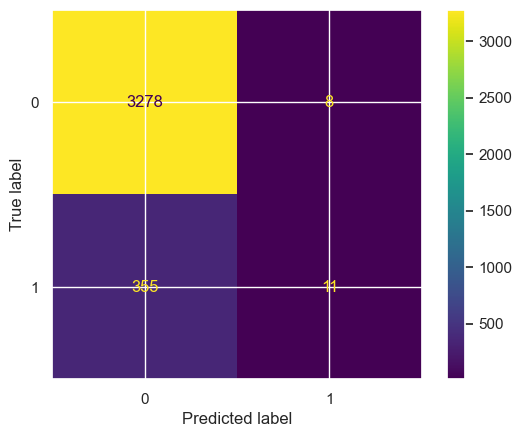

In [15]:
# plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix = conf_matrix).plot()

### Importance of Each Feature
We can plot the importance of each feature, which tells us that the attribute for forecasted electricity consumption for the next 12 months was the greatest predictor in whether or not a cusomer churned. The net margin on power subscription was a close second.

<Axes: >

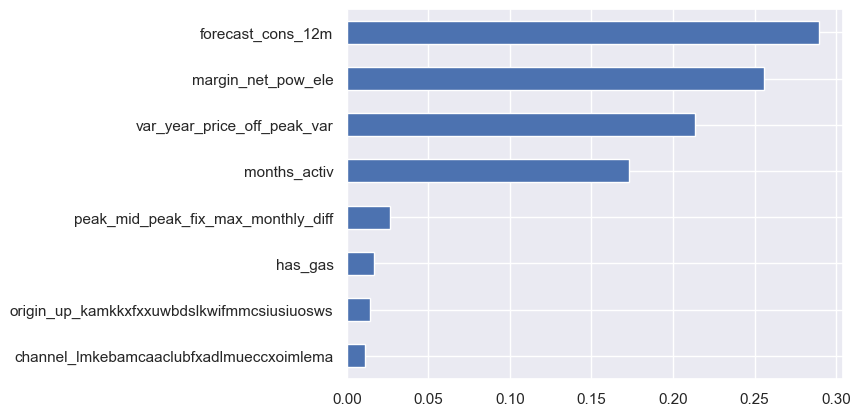

In [16]:
# Create Series with importance of each feature
feat_imp = pd.Series(best_rand.feature_importances_, index = X_features.columns).sort_values()

# Create Horizontal Bar chart
feat_imp.plot(
    kind = 'barh'
)

We see that the two best predictors of churn are a client's forecasted consumption over 12 months, and net margin of electric power.